# Linear Regression Experiments

In [46]:
import numpy as np
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(11.7,8.27)})

<Axes: >

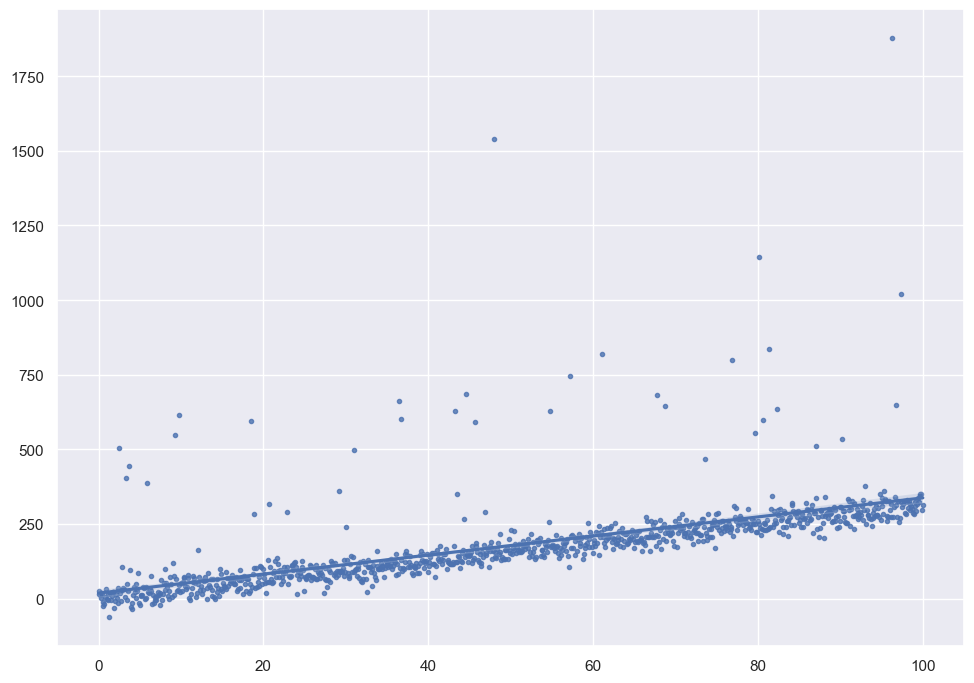

In [78]:
X_MIN = 0
X_MAX = 100

N_POINTS = 1000
N_OUTLIERS = 50

NOISE_STD = 25
OUTLIER_STD = 500

# True slope and intercept.
M = np.pi
B = np.e

# Noise
noise = np.random.normal(0, NOISE_STD, N_POINTS)

# Outlier Offsets
outliers = np.zeros(N_POINTS)
for _ in range(N_OUTLIERS):
    # All positive to skew upwards.
    outliers[np.random.randint(0, N_POINTS)] = np.abs(np.random.normal(0, OUTLIER_STD))

x = np.linspace(X_MIN, X_MAX, N_POINTS)
y = (M * x + B) + noise + outliers

df = pl.DataFrame({"x": x, "y": y})

sns.regplot(data=df, x="x", y="y", marker='.')

In [79]:
from renkon.core.stats.linear import OLSModel

OLSResults(m=[3.1921274667578987], c=18.397606464814334, ...)


<Axes: xlabel='x', ylabel='y'>

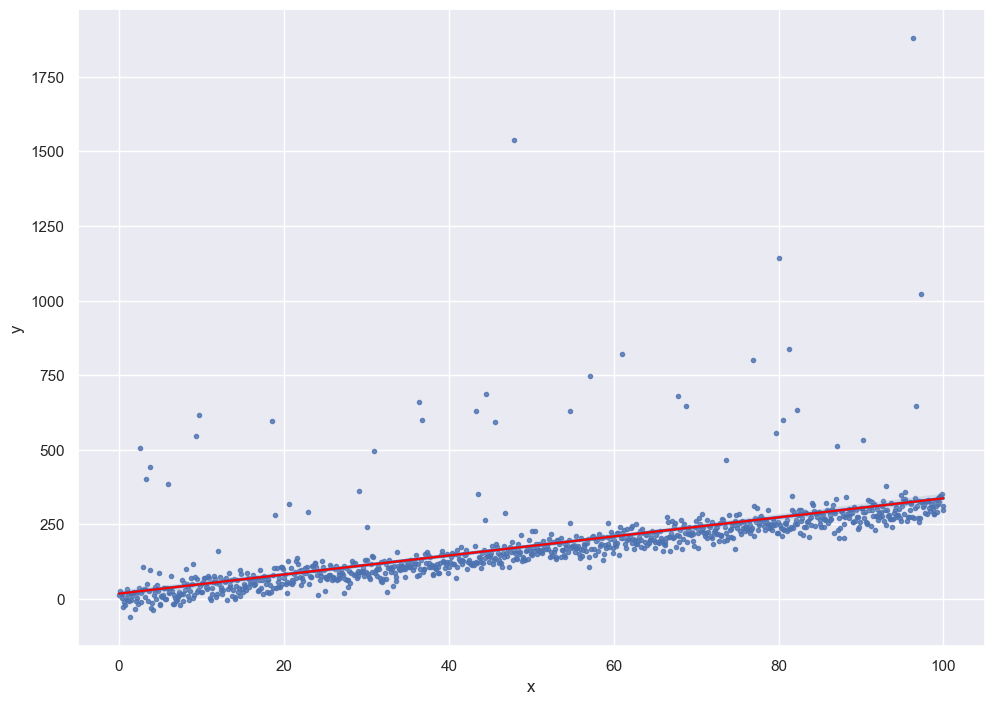

In [80]:
# Seaborn Regression Plot
sns.regplot(data=df, x="x", y="y", marker='.')

# OLSModel
model = OLSModel("y", "x")
results = model.fit(df)
print(results)
results_df = df.select(pl.col("x"), results.predict())
sns.lineplot(data=results_df, x="x", y="y", color="red")

[3.10085212] 2.9717914268512686
0.39527428543133014
0.9320472598037287


/Users/dylan/PycharmProjects/renkon/.hatch/renkon/lib/python3.12/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

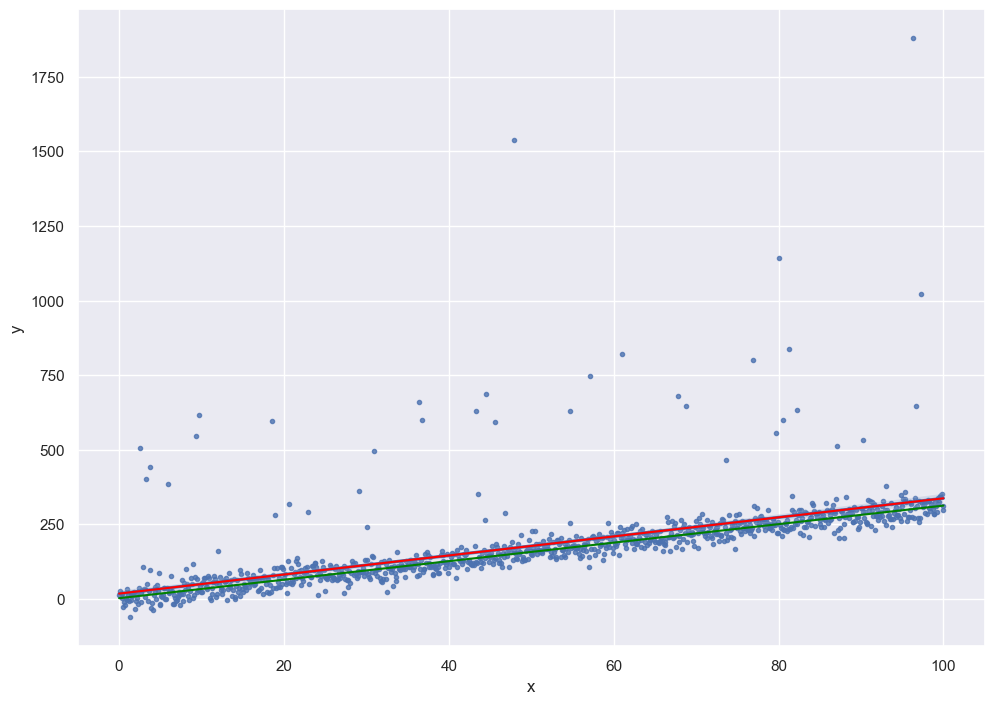

In [81]:
from sklearn.linear_model import RANSACRegressor, LinearRegression

ransac = RANSACRegressor(estimator=LinearRegression())
ransac.fit(df[["x"]], df["y"])

print(ransac.estimator_.coef_, ransac.estimator_.intercept_)
print(ransac.score(df[["x"]], df["y"]))

# Select only inlying points for scoring
inlying_x = df[["x"]].filter(ransac.inlier_mask_)
inlying_y = df[["y"]].filter(ransac.inlier_mask_)

print(ransac.estimator_.score(inlying_x, inlying_y))

# print(ransac.score(df[["x"]][ransac.inlier_mask_], df["y"][ransac.inlier_mask_]))

ransac_df = df[["x"]].with_columns(
    y = pl.Series(ransac.predict(df[["x"]]))
)

# Seaborn Regression Plot
sns.regplot(data=df, x="x", y="y", marker='.')
# OLSModel
sns.lineplot(data=results_df, x="x", y="y", color="red")
# RANSAC Regression Plot
sns.lineplot(data=ransac_df, x="x", y="y", color="green")

[0.29460266] 3.0974332629974626
-0.28636314554280284


<Axes: xlabel='y', ylabel='x'>

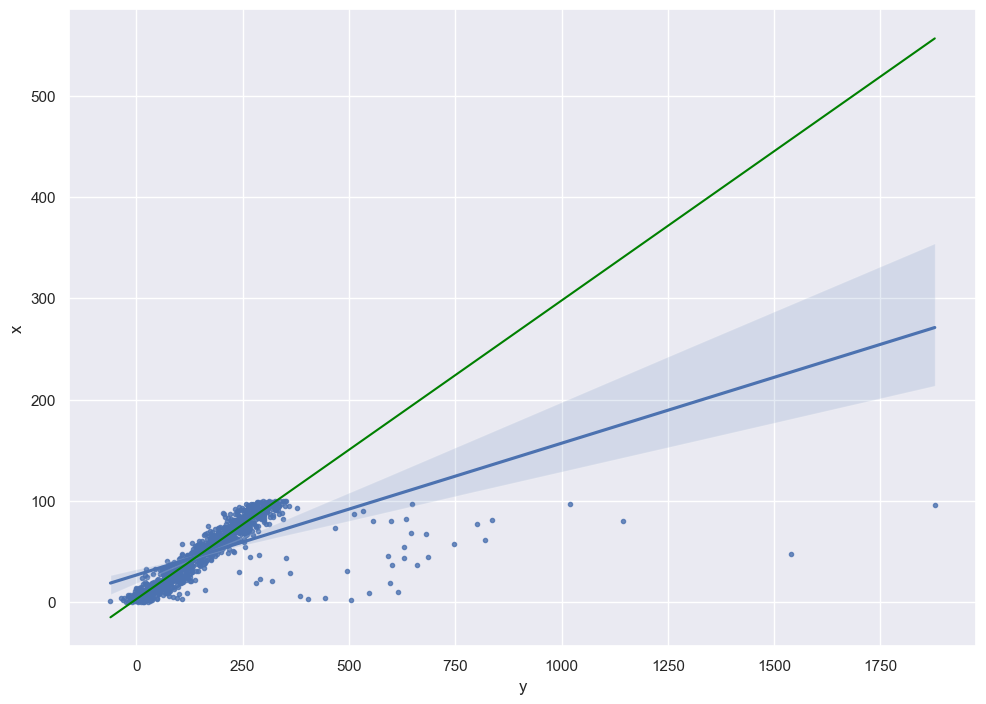

In [82]:
# x = ay + b case for testing

ransac_inv = RANSACRegressor(estimator=LinearRegression())
ransac_inv.fit(df[["y"]], df["x"])

print(ransac_inv.estimator_.coef_, ransac_inv.estimator_.intercept_)
print(ransac_inv.score(df[["y"]], df["x"]))

ransac_df = df[["y"]].with_columns(
    x = pl.Series(ransac_inv.predict(df[["y"]]))
)

# Seaborn Regression Plot
sns.regplot(data=df, x="y", y="x", marker='.')
# RANSAC Regression Plot
sns.lineplot(data=ransac_df, x="y", y="x", color="green")

In [83]:
!pwd

/Users/dylan/PycharmProjects/renkon/notebooks


In [84]:

df.write_csv("../etc/synthetic/linear1.csv")
